In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 


df = pd.read_csv('Data.csv')
df

,CSU,Description,Project_type,Approvals,Days_to_open
0,Centre for Neurosciences,Adult,Non-commercial non-portfolio,1,331
1,Emergency and Specialty Medicine,Adult,Non-commercial non-portfolio,2,194
2,Centre for Neurosciences,Adult,Non-commercial portfolio,4,297
3,Oncology,Adult,Non-commercial portfolio,3,236
4,Oncology,Adult,Commercial portfolio,8,202
...,...,...,...,...,...
114,Cardio - Respiratory,Adult,Commercial portfolio,10,89
115,Head and Neck,Adult,Non-commercial portfolio,1,46
116,Women's Hospital,Adult,Non-commercial portfolio,3,91
117,Cardio - Respiratory,Adult,Non-commercial portfolio,2,64


In [2]:
df.isnull().sum()

CSU             0
Description     0
Project_type    0
Approvals       0
Days_to_open    0
dtype: int64

In [3]:
#check for outliers
outlier = df.loc[df['Days_to_open'] <=5]
outlier

,CSU,Description,Project_type,Approvals,Days_to_open


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CSU           119 non-null    object
 1   Description   119 non-null    object
 2   Project_type  119 non-null    object
 3   Approvals     119 non-null    int64 
 4   Days_to_open  119 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.8+ KB


In [5]:
df.CSU.value_counts()

Oncology                            29
Abdominal Medicine and Surgery      22
Cardio - Respiratory                18
Children's                          15
Centre for Neurosciences             9
Women's Hospital                     5
Head and Neck                        4
Emergency and Specialty Medicine     4
Adult Theatres & Anaesthesia         3
Radiology                            2
Adult Critical Care                  2
Trauma & Related Services            2
Pathology                            2
Adult Therapies                      1
Chapel Allerton Hospital             1
Name: CSU, dtype: int64

In [6]:
#'Other' function - for CSU's with less than 2 counts
def shorten_categories (categories, cutoff):
  categorical_map = {}
  for i in range(len(categories)):
    if categories.values[i] >= cutoff:
      categorical_map[categories.index[i]] = categories.index[i]
    else:
      categorical_map[categories.index[i]] = 'Other'
  return categorical_map

In [7]:
csu_map = shorten_categories(df.CSU.value_counts(),2)
df['CSU'] = df['CSU'].map(csu_map)

In [8]:
df.CSU.value_counts()

Oncology                            29
Abdominal Medicine and Surgery      22
Cardio - Respiratory                18
Children's                          15
Centre for Neurosciences             9
Women's Hospital                     5
Head and Neck                        4
Emergency and Specialty Medicine     4
Adult Theatres & Anaesthesia         3
Radiology                            2
Adult Critical Care                  2
Other                                2
Trauma & Related Services            2
Pathology                            2
Name: CSU, dtype: int64

In [9]:
#Mean / Standard Deviation
#Mean 
mean = df['Days_to_open'].mean()
print(mean)

162.52941176470588


In [10]:
#Standard Deviation
standard_deviation = df['Days_to_open'].std()
print(standard_deviation)

101.28001321469942


In [11]:
#coeficient 
print(standard_deviation/mean)

0.6231488326637316


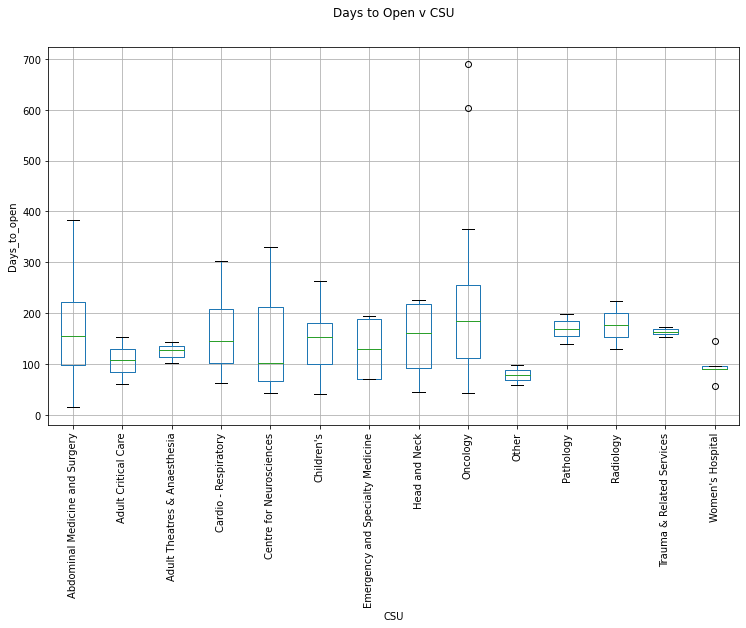

In [12]:
#box plot
# circles are outliers
#boxes are median vaues
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Days_to_open', 'CSU', ax=ax)
plt.suptitle('Days to Open v CSU')
plt.title('')
plt.ylabel('Days_to_open')
plt.xticks(rotation=90)
plt.show()

In [13]:
#Enhance box plot - exclude Days to Open where values > 300 days
df = df[df['Days_to_open'] <= 300] 

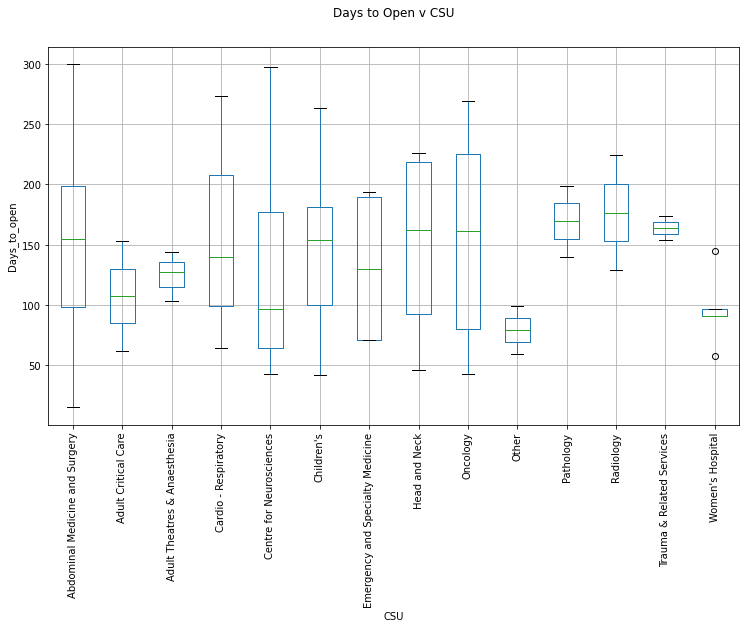

In [14]:
#box plot
# circles are outliers
#boxes are median vaues
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Days_to_open', 'CSU', ax=ax)
plt.suptitle('Days to Open v CSU')
plt.title('')
plt.ylabel('Days_to_open')
plt.xticks(rotation=90)
plt.show()

In [15]:
#count of approvals
df['Approvals'].unique()

array([ 2,  4,  3,  8,  1,  7,  5,  9, 20,  6, 10, 14, 16, 12],
      dtype=int64)

In [16]:
df.dtypes

CSU             object
Description     object
Project_type    object
Approvals        int64
Days_to_open     int64
dtype: object

In [17]:
#where approvals > 10, change to more than 10
def clean_approvals(x):
  if x >= 10:
    return 10
  return float(x)

df['Approvals'] = df['Approvals'].apply(clean_approvals) 

In [18]:
df.Approvals.value_counts()

1.0     41
2.0     23
3.0     10
10.0     9
5.0      9
4.0      8
6.0      5
9.0      3
7.0      2
8.0      2
Name: Approvals, dtype: int64

In [19]:
#transform string columns to be interpreted by ML 
#CSU
from sklearn.preprocessing import LabelEncoder
le_CSU = LabelEncoder()
df['CSU'] = le_CSU.fit_transform(df['CSU'])

In [20]:
df.CSU.unique()

array([ 6,  4,  8,  5,  1, 11,  0,  3,  9, 13,  7, 12, 10,  2])

In [21]:
le_description = LabelEncoder()
df['Description'] = le_description.fit_transform(df['Description'])

In [22]:
df.Description.unique()

array([0, 1])

In [23]:
le_projectType = LabelEncoder()
df['Project_type'] = le_projectType.fit_transform(df['Project_type'])

In [24]:
df.Project_type.unique()

array([3, 4, 2, 1, 0])

In [25]:
#Start of ML Model

In [26]:
#features = x 
#prediction = y
X = df.drop("Days_to_open", axis=1)
y = df['Days_to_open']

In [27]:
#Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [29]:
y_pred = linear_reg.predict(X)

In [30]:
#illustrates how much the output will be away from the mean on average
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [31]:
print(round(error))

65


In [32]:
#Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [34]:
y_pred = dec_tree_reg.predict(X)

In [35]:
# error
error = np.sqrt(mean_squared_error(y, y_pred))
print(round(error))

38


In [36]:
#random forrest regressor
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [37]:
y_pred = random_forest_reg.predict(X)

In [38]:
error = np.sqrt(mean_squared_error(y, y_pred))
print(round(error))

43


In [39]:
#Grid Search Cross Validation - evaluates best model for ML
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [40]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print(round(error))

63


In [41]:
X

,CSU,Description,Project_type,Approvals
1,6,0,3,2.0
2,4,0,4,4.0
3,8,0,4,3.0
4,8,0,2,8.0
5,8,0,4,1.0
...,...,...,...,...
114,3,0,2,10.0
115,7,0,4,1.0
116,13,0,4,3.0
117,3,0,4,2.0


In [42]:
# CSU, Description, ProjectType, Approvals
X = np.array([['Oncology', 'Adult', 'Commercial portfolio', 8]])
X

array([['Oncology', 'Adult', 'Commercial portfolio', '8']], dtype='<U20')

In [43]:
X[:, 0] = le_CSU.transform(X[:,0])
X[:, 1] = le_description.transform(X[:,1])
X[:, 2] = le_projectType.transform(X[:,2])
X = X.astype(float)
X

array([[8., 0., 2., 8.]])

In [44]:
#predict with above information
y_pred = regressor.predict(X)
y_pred

array([171.02857143])

In [45]:
import pickle

In [46]:
data = {'model': regressor, 'le_CSU': le_CSU, 'le_description': le_description, 'le_projectType': le_projectType}
with open('saved_steps.pkl', 'wb') as file:
  pickle.dump(data, file)

In [47]:
with open('saved_steps.pkl', 'rb') as file:
  data = pickle.load(file)

regressor_loaded = data['model']
le_CSU = data['le_CSU']
le_description = data['le_description']
le_projectType = data['le_projectType']

In [48]:
y_pred = regressor_loaded.predict(X)
y_pred

array([171.02857143])